In [ ]:
Installing MySQL on Linux using Generic Binaries
========================================================

we can install MySQL using the generic binaries available on the downloads page. 
Binaries are precompiled using advanced compilers and are built with the best possible options for optimal performance.

In [ ]:
Download the TAR binary from the MySQL Downloads page, at https://dev.mysql.com/downloads/mysql/, 
then choose Linux - Generic as the OS and select the version. You can download directly onto your server 
directly using the wget command:

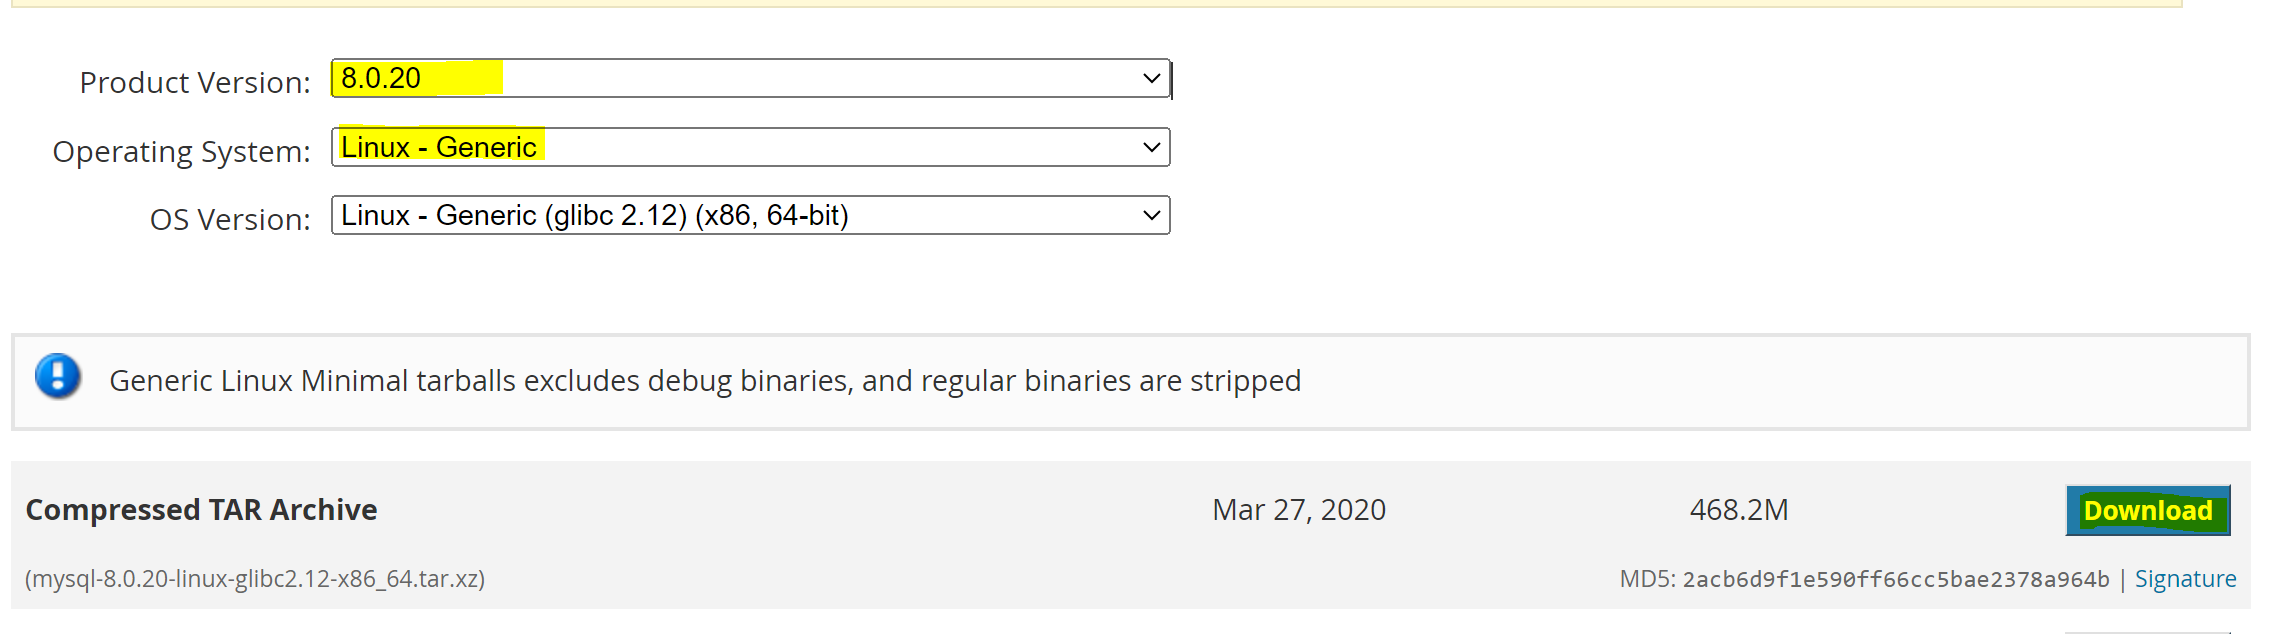

In [ ]:
[root@mysqlserver ~]# cd /opt
[root@mysqlserver opt]# 
[root@mysqlserver opt]# wget "https://downloads.mysql.com/archives/get/p/23/file/mysql-8.0.20-linux-glibc2.12-x86_64.tar.xz"



In [ ]:
MySQL has a dependency on the libaio library. The data directory initialization, and subsequent server startup steps, 
will fail if this library is not installed locally.
======================================================================================================================

[root@mysqlserver opt]# yum install -y libaio
Last metadata expiration check: 11:09:43 ago on Mon 13 May 2024 11:45:24 PM IST.
Package libaio-0.3.112-1.el8.x86_64 is already installed.
Dependencies resolved.
Nothing to do.
Complete!
[root@mysqlserver opt]# 

In [ ]:
The OS 8 platforms by default do not install the file /lib64/libtinfo.so.5, which is required by the MySQL client 
bin/mysql , To work around this issue, install the ncurses-compat-libs package.
====================================================================================================================

[root@mysqlserver opt]# yum install ncurses-compat-libs
Last metadata expiration check: 11:13:51 ago on Mon 13 May 2024 11:45:24 PM IST.
Dependencies resolved.
Installed:
  ncurses-compat-libs-6.1-9.20180224.el8.x86_64                                                                                 

Complete!
[root@mysqlserver opt]# 

In [ ]:
Add the mysql group and the mysql user. All the files and directories should be under the mysql user
========================================================================================================

[root@mysqlserver opt]# groupadd mysql
[root@mysqlserver opt]# 
[root@mysqlserver opt]# useradd -r -g mysql -s /bin/false mysql
[root@mysqlserver opt]# 
[root@mysqlserver opt]# cat /etc/passwd | grep mysql | grep -v user
mysql:x:974:1001::/home/mysql:/bin/false
[root@mysqlserver opt]# 


In [ ]:
Untar the binary file. Keep the untarred binary file at the same location and symlink it to the installation location. 
( /usr/local) In this way, you can keep multiple versions and it is very easy to upgrade. For example, you can download 
another version and untar it to a different location; while upgrading, all you need to do is to change the symlink.

[root@mysqlserver opt]# cd /usr/local
[root@mysqlserver local]# 
[root@mysqlserver local]# tar -xJvf /opt/mysql-8.0.20-linux-glibc2.12-x86_64.tar.xz
mysql-8.0.20-linux-glibc2.12-x86_64/bin/
mysql-8.0.20-linux-glibc2.12-x86_64/bin/myisam_ftdump
mysql-8.0.20-linux-glibc2.12-x86_64/bin/myisamchk
mysql-8.0.20-linux-glibc2.12-x86_64/bin/myisamlog
mysql-8.0.20-linux-glibc2.12-x86_64/bin/myisampack

[root@mysqlserver local]# pwd
/usr/local
[root@mysqlserver local]# ls -rtl
total 0
drwxr-xr-x. 2 root root   6 Jun 22  2021 src
drwxr-xr-x. 2 root root   6 Jun 22  2021 sbin
drwxr-xr-x. 2 root root   6 Jun 22  2021 libexec
drwxr-xr-x. 2 root root   6 Jun 22  2021 lib
drwxr-xr-x. 2 root root   6 Jun 22  2021 include
drwxr-xr-x. 2 root root   6 Jun 22  2021 games
drwxr-xr-x. 2 root root   6 Jun 22  2021 etc
drwxr-xr-x. 2 root root   6 Jun 22  2021 bin
drwxr-xr-x. 3 root root  17 May 13 13:38 lib64
drwxr-xr-x. 5 root root  49 May 13 13:38 share
drwxr-xr-x. 9 root root 129 May 14 11:12 mysql-8.0.20-linux-glibc2.12-x86_64
[root@mysqlserver local]# 


In [ ]:
Make the symlink
===============================

[root@mysqlserver local]# ln -s mysql-8.0.20-linux-glibc2.12-x86_64 mysql
[root@mysqlserver local]# 
[root@mysqlserver local]# ls -rtl
total 0
drwxr-xr-x. 2 root root   6 Jun 22  2021 src
drwxr-xr-x. 2 root root   6 Jun 22  2021 sbin
drwxr-xr-x. 2 root root   6 Jun 22  2021 libexec
drwxr-xr-x. 2 root root   6 Jun 22  2021 lib
drwxr-xr-x. 2 root root   6 Jun 22  2021 include
drwxr-xr-x. 2 root root   6 Jun 22  2021 games
drwxr-xr-x. 2 root root   6 Jun 22  2021 etc
drwxr-xr-x. 2 root root   6 Jun 22  2021 bin
drwxr-xr-x. 3 root root  17 May 13 13:38 lib64
drwxr-xr-x. 5 root root  49 May 13 13:38 share
drwxr-xr-x. 9 root root 129 May 14 11:12 mysql-8.0.20-linux-glibc2.12-x86_64
lrwxrwxrwx. 1 root root  35 May 14 11:15 mysql -> mysql-8.0.20-linux-glibc2.12-x86_64
[root@mysqlserver local]# 

In [ ]:
Create the necessary directories and change the ownership to mysql
=======================================================================

[root@mysqlserver local]# cd mysql
[root@mysqlserver mysql]# mkdir mysql-files
[root@mysqlserver mysql]# chmod 750 mysql-files
[root@mysqlserver mysql]# chown -R mysql .
[root@mysqlserver mysql]# chgrp -R mysql .

In [ ]:
Initialize mysql, which generates a temporary password
============================================================

[root@mysqlserver mysql]# bin/mysqld --initialize --user=mysql
2024-05-14T05:49:56.192395Z 0 [System] [MY-013169] [Server] /usr/local/mysql-8.0.20-linux-glibc2.12-x86_64/bin/mysqld 
(mysqld 8.0.20) initializing of server in progress as process 3559
2024-05-14T05:49:56.216339Z 1 [System] [MY-013576] [InnoDB] InnoDB initialization has started.
2024-05-14T05:49:59.403891Z 1 [System] [MY-013577] [InnoDB] InnoDB initialization has ended.
2024-05-14T05:50:01.330720Z 6 [Note] [MY-010454] [Server] A temporary password is generated for 
root@localhost: 0kkatlZp0R<T
[root@mysqlserver mysql]# 

In [ ]:
Set up the RSA for SSL
===============================

[root@mysqlserver mysql]# bin/mysql_ssl_rsa_setup
[root@mysqlserver mysql]# 

In [ ]:
Change the ownership of binaries to root and data files to mysql
=========================================================================

[root@mysqlserver mysql]# chown -R root .
[root@mysqlserver mysql]# 

[root@mysqlserver mysql]# chown -R mysql data mysql-files
[root@mysqlserver mysql]# 

In [ ]:
Copy the startup script to init.d
======================================

[root@mysqlserver mysql]# cp support-files/mysql.server /etc/init.d/mysql
[root@mysqlserver mysql]# 


In [ ]:
Export the binary of mysql to the PATH environment variable
=================================================================

[root@mysqlserver mysql]# export PATH=$PATH:/usr/local/mysql/bin
[root@mysqlserver mysql]# 
[root@mysqlserver mysql]# echo $PATH
/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/root/bin:/usr/local/mysql/bin
[root@mysqlserver mysql]# 

In [ ]:
Start and Stop mysql service
=================================

[root@mysqlserver mysql]# service mysql start
Starting MySQL.Logging to '/usr/local/mysql/data/mysqlserver.err'.
.. SUCCESS! 
[root@mysqlserver mysql]# 


[root@mysqlserver mysql]# mysql -u root -p
Enter password: 

mysql> alter user 'root'@'localhost' identified by 'Root@2024';
Query OK, 0 rows affected (0.02 sec)

mysql> select @@VERSION;
+-----------+
| @@VERSION |
+-----------+
| 8.0.20    |
+-----------+
1 row in set (0.00 sec)

[root@mysqlserver mysql]# service mysql stop
Shutting down MySQL.. SUCCESS! 
[root@mysqlserver mysql]# 

In [ ]:
Using init.d to start and stop mysql 
=================================================

[root@mysqlserver mysql]# /etc/init.d/mysql start
Starting MySQL.. SUCCESS! 
[root@mysqlserver mysql]# 
[root@mysqlserver mysql]# /etc/init.d/mysql status
 SUCCESS! MySQL running (4385)
[root@mysqlserver mysql]# 
[root@mysqlserver mysql]# /etc/init.d/mysql stop
Shutting down MySQL.. SUCCESS! 
[root@mysqlserver mysql]# 

In [ ]:
Setup auto-start of mysql when the server is restarted
==================================================================

[root@mysqlserver ~]# chkconfig --add mysql
[root@mysqlserver ~]# 
[root@mysqlserver ~]# chkconfig --list

mysql          	0:off	1:off	2:on	3:on	4:on	5:on	6:off

[root@mysqlserver ~]# 

[root@mysqlserver ~]# reboot

[root@mysqlserver ~]# pidof mysqld
1596

In [ ]:
Uninstalling Binaries
=======================================

Change the directory to the installation path
=====================================================

[root@mysqlserver mysql]# cd /usr/local
[root@mysqlserver local]# 


Check where mysql is pointing to, which will show the path it is referencing to
====================================================================================

[root@mysqlserver local]# sudo ls -lh mysql
lrwxrwxrwx. 1 root root 35 May 14 11:15 mysql -> mysql-8.0.20-linux-glibc2.12-x86_64
[root@mysqlserver local]# 

[root@mysqlserver local]# rm mysql
rm: remove symbolic link 'mysql'? y
[root@mysqlserver local]# 

[root@mysqlserver local]# rm -rf mysql-8.0.20-linux-glibc2.12-x86_64/
[root@mysqlserver local]# 

Remove the binaries (optional)
============================================

[root@mysqlserver local]# rm -rf /opt/mysql-8.0.20-linux-glibc2.12-x86_64.tar.xz 
[root@mysqlserver local]# 